## Bibliotecas utilizadas

In [1]:
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords

import nltk
from nltk.probability import FreqDist

import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#TRANSFORMAR SIGLAS POPULARES EM PALAVRAS

def conversao_termos(texto):
    texto = re.sub(" abc "," academia brasileira de ciência ",texto.lower())
    texto = re.sub(" ai "," arquitetura da informação ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" american society for information science and Technology "," asist ",texto.lower())
    texto = re.sub(" annual review of information science and technology "," arist ",texto.lower())
    texto = re.sub(" aoi "," arquitetura e organização da informação ",texto.lower())
    texto = re.sub(" associação brasileira de educação em ciência da informação "," abecin ",texto.lower())
    texto = re.sub(" associação brasileira de ensino de biblioteconomia e documentação "," abebd ",texto.lower())
    texto = re.sub(" associação brasileira de normas técnicas "," abnt ",texto.lower())
    texto = re.sub(" associação nacional de pesquisa e pós-graduação em ciência da informação "," ancib ",texto.lower())
    texto = re.sub(" base de dados referencial de artigos de periódicos em ciência da informação "," brapci ",texto.lower())
    texto = re.sub(" bci "," biblioteconomia e ciência da informação ",texto.lower())
    texto = re.sub(" biblioteca digital de teses e dissertações "," bdtd ",texto.lower())
    texto = re.sub(" bn "," biblioteca nacional ",texto.lower())
    texto = re.sub(" bu "," biblioteca universitária ",texto.lower())
    texto = re.sub(" c&t "," ciência e tecnologia ",texto.lower())
    texto = re.sub(" cc "," ciência da computação ",texto.lower())
    texto = re.sub(" ccn "," catálogo coletivo nacional ",texto.lower())
    texto = re.sub(" cdd "," classificação decimal de dewey ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" ci "," ciência da informação ",texto.lower())
    texto = re.sub(" ci:"," ciência da informação ",texto.lower()) 
    texto = re.sub(" ci,"," ciência da informação ",texto.lower())
    texto = re.sub(" cms "," content management system ",texto.lower())
    texto = re.sub(" cne "," conselho nacional de educação ",texto.lower())
    texto = re.sub(" conselho nacional de desenvolvimento científico e tecnológico "," cnpq ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" crm "," customer relationship management ",texto.lower())
    texto = re.sub(" dc "," dublin core ",texto.lower())
    texto = re.sub(" descriptive ontology for linguistic and cognitive engineering "," dolce ",texto.lower())
    texto = re.sub(" ead "," educação à distância ",texto.lower())
    texto = re.sub(" eci "," escola de ciência da informação ",texto.lower())
    texto = re.sub(" enade "," exame nacional de desempenho ",texto.lower())
    texto = re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",texto.lower())
    texto = re.sub(" fgv "," Fundação Getúlio Vargas ",texto.lower())
    texto = re.sub(" fiocruz "," fundação oswaldo cruz ",texto.lower())
    texto = re.sub(" ftp "," file transfer protocol ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de minas gerais "," fapemig ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de são paulo "," fapesp ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo do rio de janeiro "," faperj ",texto.lower())
    texto = re.sub(" fundação de amparo às pesquisas "," faps ",texto.lower())
    texto = re.sub(" gic "," gestão da informação e conhecimento ",str(texto.lower()))
    texto = re.sub(" gic "," gestão da informação e do conhecimento ",texto.lower())
    texto = re.sub(" gpl "," general public licence ",texto.lower())
    texto = re.sub(" hypertext markup language limguagem "," html ",texto.lower())
    texto = re.sub(" ia "," inteligência artificial ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ics "," informação cultura e sociedade ",texto.lower())
    texto = re.sub(" ict "," informação, ciência e tecnologia ",texto.lower())
    texto = re.sub(" idh "," índice de desenvolvimento humano ",texto.lower())
    texto = re.sub(" ies "," instituição de ensino superior ",texto.lower())
    texto = re.sub(" information science and technology abstracts "," ista ",texto.lower())
    texto = re.sub(" instituto brasileiro de bibliografia e documentação "," ibbd ",texto.lower())
    texto = re.sub(" instituto brasileiro de geografia e estatística "," ibge ",texto.lower())
    texto = re.sub(" instituto brasileiro de informação em ciência e tecnologia "," ibict ",texto.lower())
    texto = re.sub(" instituto de ciência da informação "," ici ",texto.lower())
    texto = re.sub(" instituto nacional de estudos e pesquisas educacionais anísio teixeira "," inep ",texto.lower())
    texto = re.sub(" instituto universitário de pesquisa do rio de janeiro "," iuoerj ",texto.lower())
    texto = re.sub(" international federation of library associations and institutions "," ifla ",texto.lower())
    texto = re.sub(" international standard book number "," isbn ",texto.lower())
    texto = re.sub(" international standard serial number "," issn ",texto.lower())
    texto = re.sub(" isi "," institute for scientific information ",texto.lower())
    texto = re.sub(" iso "," international organization for standardization ",texto.lower())
    texto = re.sub(" it "," informação e tecnologia ",texto.lower())
    texto = re.sub(" jcr "," journal citation reports ",texto.lower())
    texto = re.sub(" jstor "," journal storage ",texto.lower())
    texto = re.sub(" kos "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" lc "," linguagem cinzenta ",texto.lower())
    texto = re.sub(" ld "," linguagem documentária ",texto.lower())
    texto = re.sub(" ldb "," lei de diretrizes e bases ",texto.lower())
    texto = re.sub(" library and informations science abstracts "," lisa ",texto.lower())
    texto = re.sub(" ln "," linguagem natural ",texto.lower())
    texto = re.sub(" lod "," linked open data ",texto.lower())
    texto = re.sub(" marc "," machine readable cataloging ",texto.lower())
    texto = re.sub(" mdi "," multiple document interface ",texto.lower())
    texto = re.sub(" mec "," ministério da educação ",texto.lower())
    texto = re.sub(" npd "," núcleo de pesquisa e documentação ",texto.lower())
    texto = re.sub(" oai "," open archives iniciative ",texto.lower())
    texto = re.sub(" oc "," organização do conhecimento ",texto.lower())
    texto = re.sub(" ocr "," optical character recognition ",texto.lower())
    texto = re.sub(" oi "," organização da informação ",texto.lower())
    texto = re.sub(" ojs "," open journal systems ",texto.lower())
    texto = re.sub(" ong "," organização não-governamental ",texto.lower())
    texto = re.sub(" onu "," organização das nações unidas ",texto.lower())
    texto = re.sub(" organização das nações unidas para a educação e cultura "," unesco ",texto.lower())
    texto = re.sub(" osi "," open society institute ",texto.lower())
    texto = re.sub(" oui "," organização e uso da informação ",texto.lower())
    texto = re.sub(" owl "," web ontology language ",texto.lower())
    texto = re.sub(" pln "," processamento de linguagem natural ",texto.lower())
    texto = re.sub(" plos "," public library of science ",texto.lower())
    texto = re.sub(" poi "," produção e organização da informação ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de minas gerais "," puc mg ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de são paulo "," puc sp ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio de janeiro "," puc rj ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio grande do sul "," puc rs ",texto.lower())
    texto = re.sub(" ppg "," programa de pós-graduação ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciência da informação "," ppgci ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciências sociais "," ppgcs ",texto.lower())
    texto = re.sub(" programa de pós-graduação em sociologia "," ppgs ",texto.lower())
    texto = re.sub(" rc "," representação do conhecimento ",texto.lower())
    texto = re.sub(" rdf "," resource description framework ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" sad "," sistema de apoio à decisão ",texto.lower())
    texto = re.sub(" sci "," science citation index ",texto.lower())
    texto = re.sub(" scientific electronic library online "," scielo",texto.lower())
    texto = re.sub(" sdr "," zona de desenvolvimento real ",texto.lower())
    texto = re.sub(" serviço central de informação bibliográfica "," scib ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem comercial "," senac ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem industrial "," senai ",texto.lower())
    texto = re.sub(" serviço social da indústria "," sesi ",texto.lower())
    texto = re.sub(" serviço social do comércio "," sesc ",texto.lower())
    texto = re.sub(" sesi "," serviço social da indústria ",texto.lower())
    texto = re.sub(" sibi "," sistema integrado de bibliotecas ",texto.lower())
    texto = re.sub(" sig "," sistema de informação gerencial ",texto.lower())
    texto = re.sub(" snad "," secretária nacional de políticas anti-drogas ",texto.lower())
    texto = re.sub(" snpq "," sistema nacional de pós-graduação",texto.lower())
    texto = re.sub(" soc "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" sri "," sistema de recuperação da informação ",texto.lower())
    texto = re.sub(" ssd "," sistema de suporte à decisão ",texto.lower())
    texto = re.sub(" tcc "," trabalho de conclusão de curso ",texto.lower())
    texto = re.sub(" universidade federal de minas gerais "," ufmg ",texto.lower())
    texto = re.sub(" universidade federal de ouro preto "," ufop ",texto.lower())
    texto = re.sub(" universidade federal de pernambuco "," ufpe ",texto.lower())
    texto = re.sub(" universidade federal de santa caratina "," ufsc ",texto.lower())
    texto = re.sub(" universidade federal de são carlos "," ufscar ",texto.lower())
    texto = re.sub(" universidade federal de sergipe "," ufs ",texto.lower())
    texto = re.sub(" universidade federal de viçosa "," ufv ",texto.lower())
    texto = re.sub(" universidade federal do ceará "," ufc ",texto.lower())
    texto = re.sub(" universidade federal do estado do rio de janeiro "," unirio ",texto.lower())
    texto = re.sub(" universidade federal do maranhão "," ufma ",texto.lower())
    texto = re.sub(" universidade federal do pará "," ufpa ",texto.lower())
    texto = re.sub(" universidade federal do paraná "," ufpr ",texto.lower())
    texto = re.sub(" universidade federal do rio de janeiro "," ufrj ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do norte "," ufrn ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do sul  "," ufrgs ",texto.lower())
    texto = re.sub(" universidade federal fluminense "," uff ",texto.lower())
    texto = re.sub(" universidade federal rural do rio de janeiro "," ufrrj ",texto.lower())
    texto = re.sub(" uri "," uniform resource identifier ",texto.lower())
    texto = re.sub(" world wide web consortium "," w3c ",texto.lower())
    texto = re.sub(" xml "," extensible markup language ",texto.lower())
    texto = re.sub(" zpd "," zona de desenvolvimento proximal ",texto.lower())
    texto = re.sub("-se", "", texto.lower())
    texto = re.sub(" se ", "", texto.lower())
    texto = re.sub(" cid: ", "", texto.lower())
    texto = re.sub(" cid ", "", texto.lower())
    texto = re.sub("-lo ", "", texto.lower())
    texto = re.sub("-la ", "", texto.lower())
    texto = re.sub(" lo ", "", texto.lower())
    texto = re.sub(" la ", "", texto.lower())


    return texto

In [3]:
#CONFIGURANDO STOP_WORDS PARA PORTUGUÊS

stop_words = set(stopwords.words('portuguese'))
stop_words_us =  set(stopwords.words('english'))

#ADICIONAR INSERÇÕES DE PALAVRAS DE PARADA
new_stopwords = ['é','onde','senão','quanto','outros','sobre','sobretudo','ser','ainda','quais','desse','assim','tal','através','podemos','portanto','pode','tanto','alguns','possível','p.','v','p','-se','se',' se','nesse','nessa','neste','nesta','http','disponível','acesso','sendo','marília','rio','dessa','diz','respeito','finais','considerações','desta','belo horizointe','janeiro','fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro','porto alegre','outro','xix','londrina','paulista','xvii','sentido','maior','bem','ter','deve','devem','entretanto','fazer','todo','tipo','exemplo','pois','apenas','utilizado','utilizados','acordo','casa','figura','cada','tese','acesso','partir','parte','segundo','autor','outras','podem','vez','todos','então','sim','todas','apresenta','algumas','outra','lo','la','-lo','-la','porque','por que','os','etc','jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']

stop_words.update(new_stopwords)
stop_words.update(stop_words_us)
new_stopwords_list = set(stop_words)

In [4]:
#SETAR DOCUMENTO A SER LIDO

#CAMINHO DO ARQUIVO
data = []
pasta = "/corpus_ufmg1"
caminho="C:/Users/Marcos/tese/corpus/perspectiva" + pasta

arquivo = open(caminho + ".txt", "r",encoding="utf-8")

In [5]:
#LEITURA DO CORPUS
x=0 
for fileid in arquivo:
    document = fileid
    document = conversao_termos(document)

#    document=re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",str(document.lower()))
    data.append(document)

NO_DOCUMENTS = len(data)
print(NO_DOCUMENTS)

189


In [ ]:
#RESULTADO PARA VERIFICAÇÃO DE CONVERSÃO DE SIGLAS E LEITURA DE TEXTO CONTIDO NO CORPUS

print(data[1])

In [6]:
#FUNÇÃO BIGRAMA E TRIGRAMA

def bigramas(words):
 
    bigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-1):
            break
        else:
            bigrama_obs = words[i] + '_' + words[i+1]
            bigrams.append(bigrama_obs)
 
    return bigrams

def trigramas(words):
 
    trigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-2):
            break
        else:
            trigrama_obs = words[i] + '_' + words[i+1] + '_' + words[i+2]
            trigrams.append(trigrama_obs)
 
    return trigrams

In [7]:
# TOKENIZAR O DOCUMENTO E FAZER A STOPWORDS

def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in stop_words and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text
 
tokenized_data = []
texto2 = []
total_unigramas = []
total_bigramas = []
total_trigramas = []

for text in data:
    xtexto = clean_text(text)

#CRIAR O UNIGRAMA, BIGRAMAS, TRIGRAMAS
    unigramas = xtexto
    xbigramas = bigramas(xtexto)
    xtrigramas = trigramas(xtexto)
    xunigramas = unigramas + xbigramas + xtrigramas
    
    tokenized_data.append(xunigramas)
    texto2 = texto2 + xunigramas

#CRIAR OPÇÃO PARA MOSTRAR A FREQUENCIA SOMENTE DE UNIGRAMA , BIGRAMAS E TRIGRAMAS
    total_unigramas = total_unigramas + unigramas
    total_bigramas = total_bigramas + xbigramas
    total_trigramas = total_trigramas + xtrigramas
    
xfrequencia = texto2

In [8]:
#TOTAL DE UNIGRAMAS, BIGRAMAS E TRIGRAMAS
print("Total de Unigramas: "+ str((len(total_unigramas))))
print("Total de Bigramas: "+ str((len(total_bigramas))))
print("Total de Trigramas: "+ str((len(total_trigramas))))

Total de Unigramas: 5034530
Total de Bigramas: 5034341
Total de Trigramas: 5034152


In [ ]:
#CELULA EXTRA - VERIFICAR TEXTO TOKENIZADO
print(tokenized_data[1])

# CRIANDO A FREQUÊNCIA

In [8]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA GERAL
num_freq = 1000
fdist = FreqDist(xfrequencia)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_geral"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação': 59877, 'pesquisa': 24436, 'conhecimento': 21872, 'dados': 15969, 'trabalho': 15344, 'forma': 14995, 'biblioteca': 14776, 'informações': 14353, 'processo': 13488, 'relação': 12539, 'uso': 12181, 'documentos': 11629, 'sistema': 10710, 'social': 10695, 'bibliotecas': 10625, 'organização': 10582, 'gestão': 10317, 'usuários': 9646, 'desenvolvimento': 9524, 'brasil': 9497, 'busca': 9396, 'produção': 9123, 'fonte': 9056, 'meio': 8630, 'estudo': 8284, 'sociais': 7904, 'estudos': 7884, 'sistemas': 7816, 'sociedade': 7745, 'avaliação': 7711, 'atividades': 7676, 'cultura': 7665, 'tempo': 7649, 'modelo': 7498, 'universidade': 7459, 'educação': 7361, 'estado': 7360, 'comunicação': 7338, 'contexto': 7212, 'nacional': 7078, 'pessoas': 7073, 'relações': 6902, 'anos': 6867, 'base': 6801, 'termos': 6742, 'escola': 6636, 'caso': 6618, 'usuário': 6607, 'information': 6546, 'resultados': 6508, 'política': 6258, 'conceito': 6246, 'quadro': 6196, 'campo': 6164, 'científica': 6127, 'bi


  PALAVRA -- FREQUÊNCIA


[('informação', 59877),
 ('pesquisa', 24436),
 ('conhecimento', 21872),
 ('dados', 15969),
 ('trabalho', 15344),
 ('forma', 14995),
 ('biblioteca', 14776),
 ('informações', 14353),
 ('processo', 13488),
 ('relação', 12539),
 ('uso', 12181),
 ('documentos', 11629),
 ('sistema', 10710),
 ('social', 10695),
 ('bibliotecas', 10625),
 ('organização', 10582),
 ('gestão', 10317),
 ('usuários', 9646),
 ('desenvolvimento', 9524),
 ('brasil', 9497),
 ('busca', 9396),
 ('produção', 9123),
 ('fonte', 9056),
 ('meio', 8630),
 ('estudo', 8284),
 ('sociais', 7904),
 ('estudos', 7884),
 ('sistemas', 7816),
 ('sociedade', 7745),
 ('avaliação', 7711),
 ('atividades', 7676),
 ('cultura', 7665),
 ('tempo', 7649),
 ('modelo', 7498),
 ('universidade', 7459),
 ('educação', 7361),
 ('estado', 7360),
 ('comunicação', 7338),
 ('contexto', 7212),
 ('nacional', 7078),
 ('pessoas', 7073),
 ('relações', 6902),
 ('anos', 6867),
 ('base', 6801),
 ('termos', 6742),
 ('escola', 6636),
 ('caso', 6618),
 ('usuário', 6607

In [11]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA UNIGRAMA
num_freq = 1000
fdist = FreqDist(total_unigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_unigrama"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação': 59877, 'pesquisa': 24436, 'conhecimento': 21872, 'dados': 15969, 'trabalho': 15344, 'forma': 14995, 'biblioteca': 14776, 'informações': 14353, 'processo': 13488, 'relação': 12539, 'uso': 12181, 'documentos': 11629, 'sistema': 10710, 'social': 10695, 'bibliotecas': 10625, 'organização': 10582, 'gestão': 10317, 'usuários': 9646, 'desenvolvimento': 9524, 'brasil': 9497, 'busca': 9396, 'produção': 9123, 'fonte': 9056, 'meio': 8630, 'estudo': 8284, 'sociais': 7904, 'estudos': 7884, 'sistemas': 7816, 'sociedade': 7745, 'avaliação': 7711, 'atividades': 7676, 'cultura': 7665, 'tempo': 7649, 'modelo': 7498, 'universidade': 7459, 'educação': 7361, 'estado': 7360, 'comunicação': 7338, 'contexto': 7212, 'nacional': 7078, 'pessoas': 7073, 'relações': 6902, 'anos': 6867, 'base': 6801, 'termos': 6742, 'escola': 6636, 'caso': 6618, 'usuário': 6607, 'information': 6546, 'resultados': 6508, 'política': 6258, 'conceito': 6246, 'quadro': 6196, 'campo': 6164, 'científica': 6127, 'bi

[('informação', 59877),
 ('pesquisa', 24436),
 ('conhecimento', 21872),
 ('dados', 15969),
 ('trabalho', 15344),
 ('forma', 14995),
 ('biblioteca', 14776),
 ('informações', 14353),
 ('processo', 13488),
 ('relação', 12539),
 ('uso', 12181),
 ('documentos', 11629),
 ('sistema', 10710),
 ('social', 10695),
 ('bibliotecas', 10625),
 ('organização', 10582),
 ('gestão', 10317),
 ('usuários', 9646),
 ('desenvolvimento', 9524),
 ('brasil', 9497),
 ('busca', 9396),
 ('produção', 9123),
 ('fonte', 9056),
 ('meio', 8630),
 ('estudo', 8284),
 ('sociais', 7904),
 ('estudos', 7884),
 ('sistemas', 7816),
 ('sociedade', 7745),
 ('avaliação', 7711),
 ('atividades', 7676),
 ('cultura', 7665),
 ('tempo', 7649),
 ('modelo', 7498),
 ('universidade', 7459),
 ('educação', 7361),
 ('estado', 7360),
 ('comunicação', 7338),
 ('contexto', 7212),
 ('nacional', 7078),
 ('pessoas', 7073),
 ('relações', 6902),
 ('anos', 6867),
 ('base', 6801),
 ('termos', 6742),
 ('escola', 6636),
 ('caso', 6618),
 ('usuário', 6607

In [12]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA BIGRAMA
num_freq = 1000
fdist = FreqDist(total_bigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_bigrama"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'belo_horizonte': 4841, 'minas_gerais': 3438, 'universidade_federal': 2602, 'informação_conhecimento': 1936, 'produção_científica': 1919, 'recuperação_informação': 1900, 'fontes_informação': 1742, 'gestão_informação': 1681, 'gestão_conhecimento': 1596, 'escola_informação': 1565, 'uso_informação': 1541, 'fonte_elaborado': 1523, 'ponto_vista': 1468, 'ensino_superior': 1454, 'sistemas_informação': 1378, 'base_dados': 1346, 'coleta_dados': 1326, 'redes_sociais': 1323, 'bases_dados': 1314, 'informação_tecnologia': 1313, 'dados_pesquisa': 1277, 'muitas_vezes': 1276, 'tomada_decisão': 1268, 'federal_minas': 1261, 'inclusão_digital': 1218, 'dissertação_mestrado': 1214, 'information_science': 1213, 'biblioteca_escolar': 1210, 'ouro_preto': 1185, 'bibliotecas_digitais': 1183, 'fonte_dados': 1152, 'portal_periódicos': 1044, 'patrimônio_cultural': 1019, 'estados_unidos': 1007, 'organização_informação': 1001, 'estudos_usuários': 999, 'organização_conhecimento': 994, 'informação_comunicaçã


  PALAVRA -- FREQUÊNCIA


[('belo_horizonte', 4841),
 ('minas_gerais', 3438),
 ('universidade_federal', 2602),
 ('informação_conhecimento', 1936),
 ('produção_científica', 1919),
 ('recuperação_informação', 1900),
 ('fontes_informação', 1742),
 ('gestão_informação', 1681),
 ('gestão_conhecimento', 1596),
 ('escola_informação', 1565),
 ('uso_informação', 1541),
 ('fonte_elaborado', 1523),
 ('ponto_vista', 1468),
 ('ensino_superior', 1454),
 ('sistemas_informação', 1378),
 ('base_dados', 1346),
 ('coleta_dados', 1326),
 ('redes_sociais', 1323),
 ('bases_dados', 1314),
 ('informação_tecnologia', 1313),
 ('dados_pesquisa', 1277),
 ('muitas_vezes', 1276),
 ('tomada_decisão', 1268),
 ('federal_minas', 1261),
 ('inclusão_digital', 1218),
 ('dissertação_mestrado', 1214),
 ('information_science', 1213),
 ('biblioteca_escolar', 1210),
 ('ouro_preto', 1185),
 ('bibliotecas_digitais', 1183),
 ('fonte_dados', 1152),
 ('portal_periódicos', 1044),
 ('patrimônio_cultural', 1019),
 ('estados_unidos', 1007),
 ('organização_infor

In [13]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA TRIGRAMA
num_freq = 1000
fdist = FreqDist(total_trigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_trigrama"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'federal_minas_gerais': 1234, 'universidade_federal_minas': 1126, 'fonte_dados_pesquisa': 1030, 'portal_periódicos_capes': 928, 'gestão_informação_conhecimento': 722, 'fonte_elaborado_autora': 699, 'tecnologias_informação_comunicação': 581, 'informação_universidade_federal': 574, 'dissertação_mestrado_informação': 520, 'escola_informação_ufmg': 481, 'estado_minas_gerais': 454, 'international_organization_standardization': 433, 'minas_gerais_escola': 412, 'gerais_belo_horizonte': 409, 'acute_myeloid_leukemia': 409, 'minas_gerais_belo': 408, 'domínio_escopo_mpeg7': 406, 'instituições_ensino_superior': 396, 'gerais_escola_informação': 383, 'informação_belo_horizonte': 379, 'instituição_ensino_superior': 379, 'política_nacional_arquivos': 364, 'arquivologia_biblioteconomia_museologia': 358, 'web_ontology_language': 346, 'escola_informação_universidade': 327, 'informação_escola_informação': 318, 'sistemas_organização_conhecimento': 307, 'american_society_information': 305, 'societ


  PALAVRA -- FREQUÊNCIA


[('federal_minas_gerais', 1234),
 ('universidade_federal_minas', 1126),
 ('fonte_dados_pesquisa', 1030),
 ('portal_periódicos_capes', 928),
 ('gestão_informação_conhecimento', 722),
 ('fonte_elaborado_autora', 699),
 ('tecnologias_informação_comunicação', 581),
 ('informação_universidade_federal', 574),
 ('dissertação_mestrado_informação', 520),
 ('escola_informação_ufmg', 481),
 ('estado_minas_gerais', 454),
 ('international_organization_standardization', 433),
 ('minas_gerais_escola', 412),
 ('gerais_belo_horizonte', 409),
 ('acute_myeloid_leukemia', 409),
 ('minas_gerais_belo', 408),
 ('domínio_escopo_mpeg7', 406),
 ('instituições_ensino_superior', 396),
 ('gerais_escola_informação', 383),
 ('informação_belo_horizonte', 379),
 ('instituição_ensino_superior', 379),
 ('política_nacional_arquivos', 364),
 ('arquivologia_biblioteconomia_museologia', 358),
 ('web_ontology_language', 346),
 ('escola_informação_universidade', 327),
 ('informação_escola_informação', 318),
 ('sistemas_organi

## Gráfico

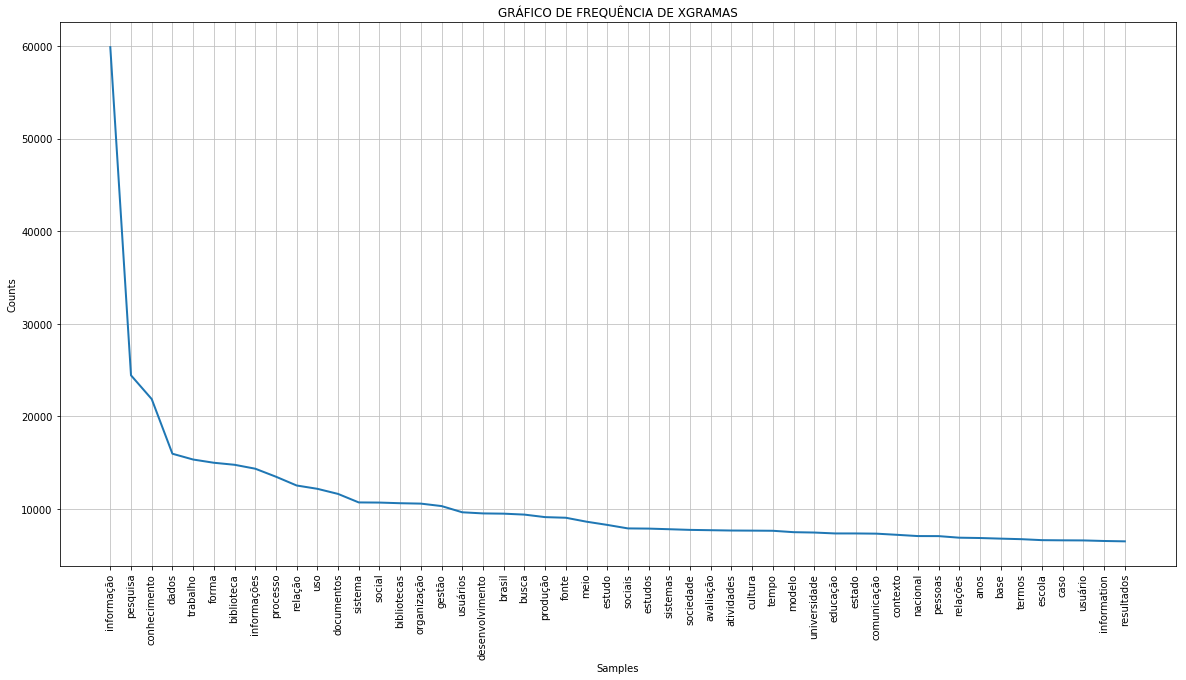

In [14]:
# MOSTRAR O GRÁFICO 

num_freq = 50
#fdist.figure(figsize=(30, 20))
arquivo_grafico = xfrequencia #mudar a variável para representações xgramas v1: total_unigramas v2: total_bigramas v3: total_trigramas v4: xfrequencia
fdist = FreqDist(arquivo_grafico)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) 
fdist.plot(num_freq,cumulative=False,title='GRÁFICO DE FREQUÊNCIA DE XGRAMAS')

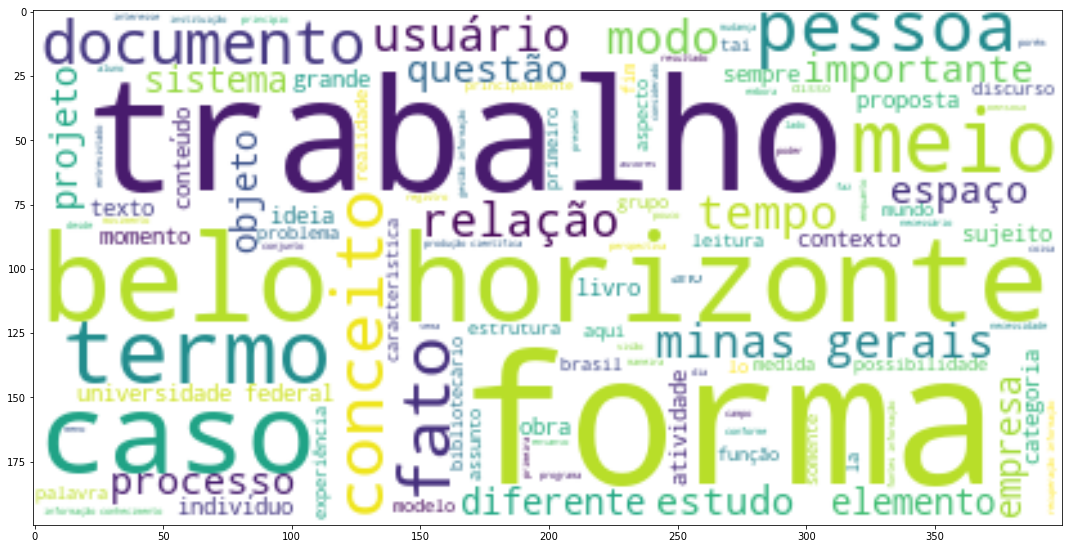

In [15]:
#NUVEM DE PALAVRAS

from wordcloud import WordCloud
cleaned =  ' '.join(xfrequencia)
num_freq = 150
wordcloud = WordCloud(max_font_size=70, max_words=num_freq, background_color="white").generate(cleaned)
fig, ax = plt.subplots(figsize=(15, 20))
ax.imshow(wordcloud, interpolation='nearest')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout()
plt.savefig("img/corpus_ufmg1_nuv.png", format = "png")

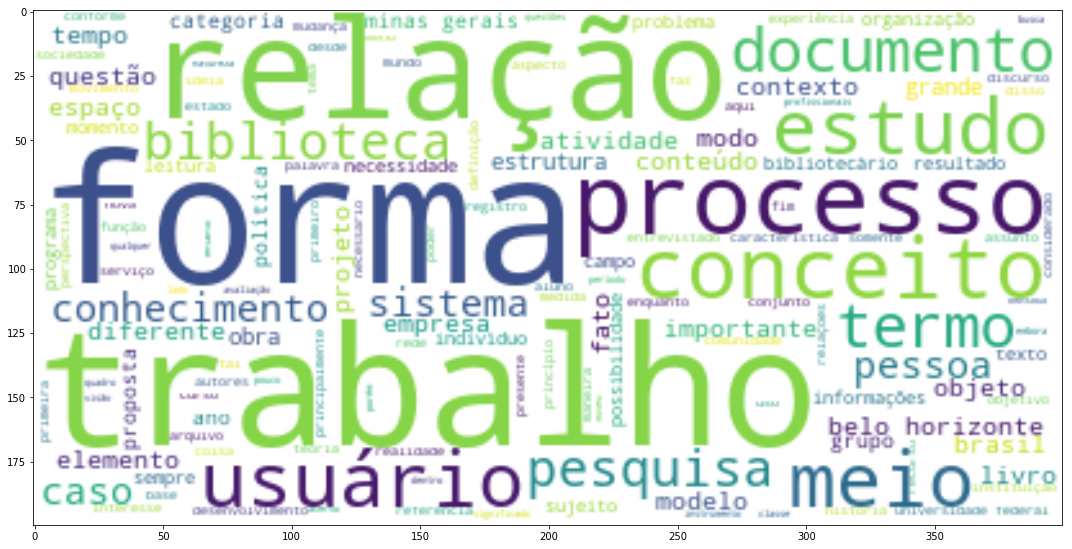

In [17]:
#NUVEM UNIGRAMAS
from wordcloud import WordCloud
cleaned =  ' '.join(total_unigramas)
num_freq = 150
wordcloud = WordCloud(max_font_size=70, max_words=num_freq, background_color="white").generate(cleaned)
fig, ax = plt.subplots(figsize=(15, 20))
ax.imshow(wordcloud, interpolation='nearest')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout()
plt.savefig("img/corpus_ufmg1_nuv_unigramas.png", format = "png")

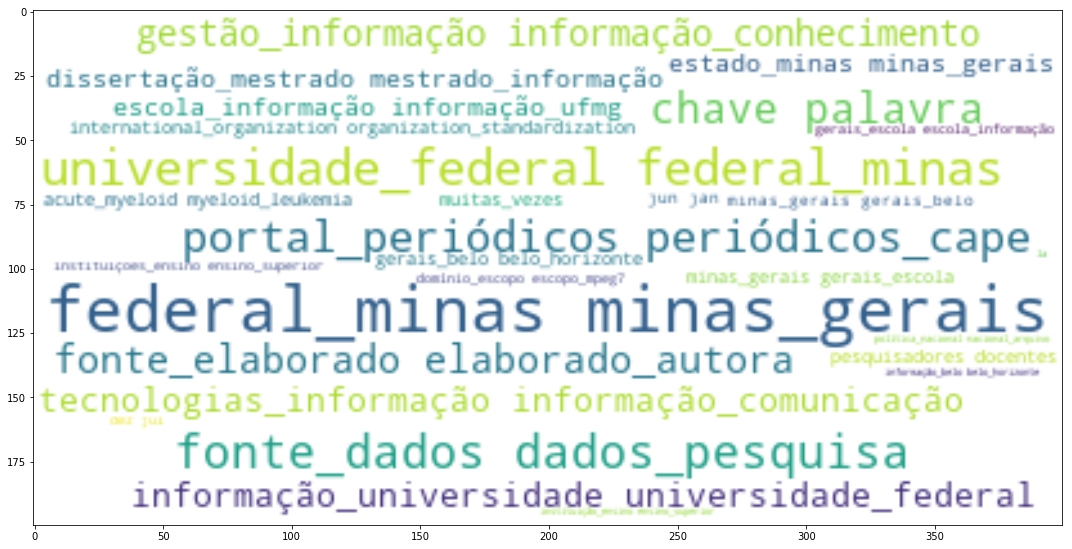

In [18]:
#NUVEM BIGRAMAS
from wordcloud import WordCloud
cleaned =  ' '.join(total_bigramas)
num_freq = 150
wordcloud = WordCloud(max_font_size=70, max_words=num_freq, background_color="white").generate(cleaned)
fig, ax = plt.subplots(figsize=(15, 20))
ax.imshow(wordcloud, interpolation='nearest')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout()
plt.savefig("img/corpus_ufmg1_nuv_bigramas.png", format = "png")

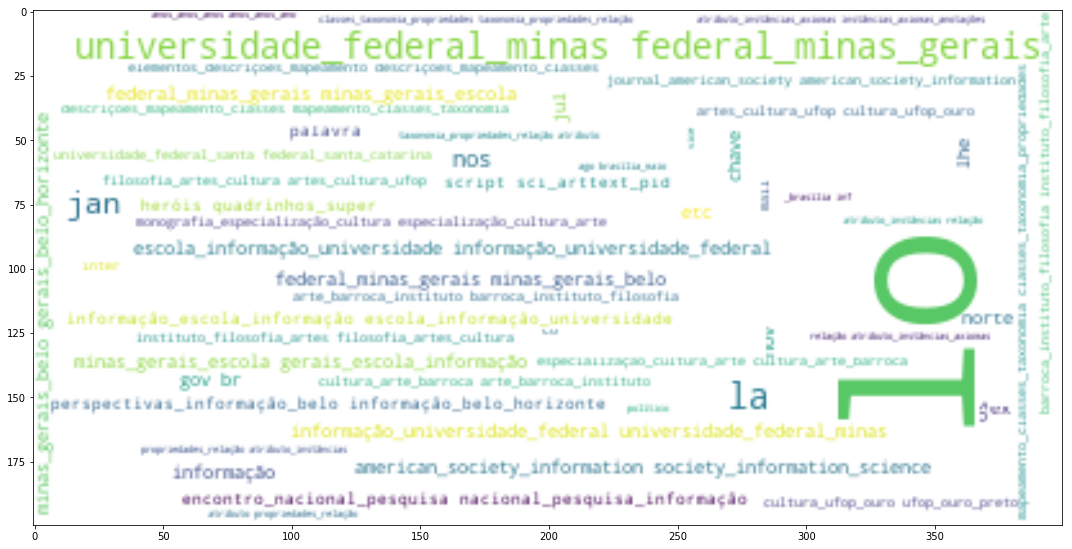

In [19]:
#NUVEM TRIGRAMAS
from wordcloud import WordCloud
cleaned =  ' '.join(total_trigramas)
num_freq = 150
wordcloud = WordCloud(max_font_size=70, max_words=num_freq, background_color="white").generate(cleaned)
fig, ax = plt.subplots(figsize=(15, 20))
ax.imshow(wordcloud, interpolation='nearest')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout()
plt.savefig("img/corpus_ufmg1_nuv_trigramas.png", format = "png")

# CRIANDO O DICIONÁRIO E O CORPUS

In [9]:
#CRIAR DICIONÁRIO 
dictionary = corpora.Dictionary(tokenized_data)
 
#TRANSFORMAR A COLEÇÃO TEXTO COM ID
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

### LDA

In [21]:
print("=========================================== Modelo LDA: 06 TÓPICOS ==================================================\n")
num_topics = 6

chunksize = 300
passes = 15
iterations = 250
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

print("=========================================== Modelo LDA: 08 TÓPICOS ==================================================\n")
num_topics = 8

chunksize = 300
passes = 15
iterations = 250
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

print("=========================================== Modelo LDA: 10 TÓPICOS ==================================================\n")
num_topics = 10

chunksize = 300
passes = 15
iterations = 250
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

print("=========================================== Modelo LDA: 12 TÓPICOS ==================================================\n")
num_topics = 12

chunksize = 300
passes = 15
iterations = 250
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))
 
print("=========================================== Modelo LDA: 14 TÓPICOS ==================================================\n")
num_topics = 14

chunksize = 300
passes = 15
iterations = 250
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

print("=========================================== Modelo LDA: 16 TÓPICOS ==================================================\n")
num_topics = 16

chunksize = 300
passes = 15
iterations = 250
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

print("=========================================== Modelo LDA: 18 TÓPICOS ==================================================\n")
num_topics = 18

chunksize = 300
passes = 15
iterations = 250
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))
    
print("=========================================== Modelo LDA: 20 TÓPICOS ==================================================\n")
num_topics = 20

chunksize = 300
passes = 15
iterations = 250
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 06 TÓPICOS ==================================================

Wall time: 30min 49s
Tópico 0:  0.008*"informação" + 0.003*"pesquisa" + 0.003*"conhecimento" + 0.002*"forma" + 0.002*"dados" + 0.002*"trabalho" + 0.002*"informações" + 0.002*"biblioteca" + 0.002*"processo" + 0.002*"uso"
Tópico 1:  0.001*"quadrinhos" + 0.001*"musical" + 0.000*"performance" + 0.000*"leitores" + 0.000*"histórias" + 0.000*"histórias_quadrinhos" + 0.000*"gyn" + 0.000*"super-heróis" + 0.000*"quadrinhos_super-heróis" + 0.000*"partitura"
Tópico 2:  0.001*"leukemia" + 0.000*"acute" + 0.000*"myeloid" + 0.000*"myeloid_leukemia" + 0.000*"acute_myeloid" + 0.000*"acute_myeloid_leukemia" + 0.000*"characterized" + 0.000*"definições" + 0.000*"gene" + 0.000*"marrow"
Tópico 3:  0.001*"duelo" + 0.001*"mcs" + 0.000*"inovação" + 0.000*"duelo_mcs" + 0.000*"hip-hop" + 0.000*"aem" + 0.000*"nanopublicação" + 0.000*"netnografia" + 0.000*"viaduto" + 0.000*"família_rua"
Tópico 4: 

Wall time: 1h 11min 28s
Tópico 0:  0.002*"quadrinhos" + 0.001*"histórias_quadrinhos" + 0.001*"gyn" + 0.001*"super-heróis" + 0.000*"quadrinhos_super-heróis" + 0.000*"comics" + 0.000*"marvel" + 0.000*"histórias" + 0.000*"histórias_quadrinhos_super-heróis" + 0.000*"core_comics"
Tópico 1:  0.008*"informação" + 0.003*"pesquisa" + 0.003*"conhecimento" + 0.002*"dados" + 0.002*"trabalho" + 0.002*"forma" + 0.002*"informações" + 0.002*"processo" + 0.002*"relação" + 0.002*"documentos"
Tópico 2:  0.001*"alinhamento" + 0.001*"ontologias" + 0.001*"baixa" + 0.000*"multinucleate" + 0.000*"alta" + 0.000*"ontologia" + 0.000*"mpd" + 0.000*"uninucleate" + 0.000*"cobertura" + 0.000*"visualização"
Tópico 3:  0.000*"ontouml" + 0.000*"oled" + 0.000*"parte-todo" + 0.000*"grp" + 0.000*"modelo_uml" + 0.000*"teste_oled" + 0.000*"uml" + 0.000*"relações_parte-todo" + 0.000*"modelo_ontouml" + 0.000*"critérios_ontológicos"
Tópico 4:  0.000*"informação" + 0.000*"pesquisa" + 0.000*"trabalho" + 0.000*"conhecimento" + 0.

Tópico 7:  0.001*"base_dados" + 0.001*"treinamento" + 0.001*"cobertura" + 0.000*"teste" + 0.000*"clica" + 0.000*"preenchido" + 0.000*"produtor" + 0.000*"seleciona" + 0.000*"busca" + 0.000*"buscar"
Tópico 8:  0.010*"informação" + 0.004*"pesquisa" + 0.004*"conhecimento" + 0.003*"trabalho" + 0.003*"biblioteca" + 0.002*"forma" + 0.002*"informações" + 0.002*"processo" + 0.002*"dados" + 0.002*"bibliotecas"
Tópico 9:  0.000*"informação" + 0.000*"social" + 0.000*"informações" + 0.000*"pesquisa" + 0.000*"sujeitos" + 0.000*"sociais" + 0.000*"trabalho" + 0.000*"informacionais" + 0.000*"informacional" + 0.000*"orkutização"
Tópico 10:  0.000*"informação" + 0.000*"pesquisa" + 0.000*"conhecimento" + 0.000*"biblioteca" + 0.000*"forma" + 0.000*"dados" + 0.000*"uso" + 0.000*"busca" + 0.000*"informações" + 0.000*"relação"
Tópico 11:  0.002*"cartas" + 0.001*"duelo" + 0.001*"mcs" + 0.001*"carta" + 0.001*"convenção" + 0.001*"duelo_mcs" + 0.001*"jornal" + 0.001*"crianças" + 0.001*"trabalho_infantil" + 0.001*

In [10]:
#IMPRESSÃO DO MELHOR RESULTADO
print("=========================================== Modelo LDA: XX TÓPICOS ==================================================\n")
num_topics = 10 

chunksize = 300
passes = 15
iterations = 250
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: XX TÓPICOS ==================================================

Wall time: 36min 56s
Tópico 0:  0.003*"ontologia" + 0.003*"ontologias" + 0.002*"domínio" + 0.002*"conceitos" + 0.001*"ontology" + 0.001*"conhecimento" + 0.001*"dados" + 0.001*"relações" + 0.001*"definição" + 0.001*"conteúdo"
Tópico 1:  0.000*"alinhamento" + 0.000*"multinucleate" + 0.000*"uninucleate" + 0.000*"macroconidium" + 0.000*"visualização" + 0.000*"arthroconidium" + 0.000*"conidium" + 0.000*"spore" + 0.000*"blastoconidium" + 0.000*"multinucleate_macroconidium"
Tópico 2:  0.005*"informação" + 0.002*"informações" + 0.002*"busca" + 0.002*"dados" + 0.002*"fontes" + 0.001*"pesquisa" + 0.001*"uso" + 0.001*"direito" + 0.001*"portal" + 0.001*"usuários"
Tópico 3:  0.001*"científica" + 0.001*"universidade" + 0.001*"produção_científica" + 0.001*"artigos" + 0.001*"brasil" + 0.001*"curso" + 0.001*"instituto" + 0.001*"produção" + 0.001*"pesquisa" + 0.001*"journal"
Tópico 4:  

### PyLDAvis

In [11]:
#IMPORTAR BIBLIOTECA PARA VISUALIZAÇÃO DOS TÓPICOS LDA
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#VISUALIZAR NO GRÁFICO PYLDAVIS
pyLDAvis.enable_notebook()
%time vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.save_html(vis, 'perspectiva_lda.html')
vis

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

NameError: name 'vis' is not defined